<a href="https://colab.research.google.com/github/Rattan-kaur-Bajwa/Heart-disease-prediction-system/blob/main/Phase%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
Coronary Artery Disease (CAD) is a major cardiovascular condition that affects millions of people worldwide. It occurs due to the narrowing or blockage of coronary arteries caused by plaque buildup, leading to reduced blood flow to the heart. If left untreated, CAD can result in severe complications such as heart attacks, arrhythmias, and heart failure. Early prediction of CAD is crucial for effective prevention and treatment.

# **Background**
Traditional methods for diagnosing CAD, such as stress tests, electrocardiograms (ECG), and coronary angiography, are often expensive, time-consuming, and sometimes invasive. While these methods are reliable, they may not always be accessible to a large population, leading to delays in diagnosis and treatment. Machine Learning (ML) models provide a promising alternative by analyzing patient data and identifying hidden patterns that can help predict CAD at an early stage. These models can process vast amounts of medical data efficiently, offering a non-invasive and cost-effective approach to disease prediction.

# **About the Dataset**
The dataset being analyzed comprises details about individuals, encompassing attributes such as age, education level, gender, smoking habits, and various health-related metrics, including cholesterol levels, blood pressure, BMI, and glucose levels. Additionally, it features a key target variable, "TenYearCHD," which signifies whether a person is at risk of developing coronary heart disease within the next decade (1 indicating risk, 0 indicating no risk).

# **Objectives**
The primary objectives of using ML for CAD prediction include:


1) Developing a reliable and non-invasive predictive model for early CAD detection.
Identifying key risk factors contributing to CAD using data-driven techniques.

2) Improving diagnostic accuracy and reducing the dependency on invasive procedures.

3)Enhancing healthcare decision-making by providing doctors with valuable insights.

# **Significance**

The integration of ML in CAD prediction has significant implications for public health. Early detection allows for timely intervention, lifestyle modifications, and personalized treatment plans, ultimately reducing the burden of cardiovascular diseases. ML models can assist healthcare professionals in making data-driven decisions, improving diagnostic efficiency, and ensuring better patient outcomes. By leveraging AI-driven approaches, the healthcare industry can move towards more preventive and proactive strategies in managing heart diseases.

# **Import all necessary libraries beforehand**

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
!pip install imblearn

In [12]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Analysis
import pandas as pd
import numpy as np


#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# **Dataset Description**

The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

##  Features Overview
### **Demographic**  
- **Sex:** Male or Female (Integer: 1 = Male, 0 = Female).  
- **Age:** Age of the patient (Integer, Continuous).  
- **Education:** Education level (Float, Categorical: 1 = Higher Secondary, 2 = Graduation, 3 = Post Graduation, 4 = PhD).  

### **Behavioral**  
- **Current Smoker:** Whether the patient is a current smoker (Integer: 1 = Yes, 0 = No).  
- **Cigs Per Day:** Number of cigarettes smoked on average per day (Float, Continuous).  

### **Medical (History)**  
- **BP Meds:** Whether the patient is on blood pressure medication (Float, Binary: 1 = Yes, 0 = No).  
- **Prevalent Stroke:** Whether the patient has had a previous stroke (Integer, Binary: 1 = Yes, 0 = No).  
- **Prevalent Hyp:** Whether the patient has hypertension (Integer, Binary: 1 = Yes, 0 = No).  
- **Diabetes:** Whether the patient has diabetes (Integer, Binary: 1 = Yes, 0 = No).  

### **Medical (Current)**  
- **Total Cholesterol (totChol):** Total cholesterol level (Float, Continuous).  
- **Systolic Blood Pressure (sysBP):** Systolic blood pressure (Float, Continuous).  
- **Diastolic Blood Pressure (diaBP):** Diastolic blood pressure (Float, Continuous).  
- **Body Mass Index (BMI):** BMI of the patient (Float, Continuous).  
- **Heart Rate:** Heart rate (Float, Continuous).  
- **Glucose:** Glucose level (Float, Continuous).  

### **Predictive Variable (Target Outcome)**  
- **Ten-Year CHD Risk (TenYearCHD):** Binary target variable indicating the risk of developing Coronary Heart Disease (Integer: 1 = At Risk, 0 = Not at Risk).




In [13]:
df=pd.read_csv("/dataset_heart.zip")

In [14]:
df.shape

(4240, 16)

In [15]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


#Missing data values

In [16]:

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({"Missing Values": missing_values, "Missing Percentage": missing_percentage})
print(missing_data.sort_values(by="Missing Percentage", ascending=False))


                 Missing Values  Missing Percentage
glucose                     388            9.150943
education                   105            2.476415
BPMeds                       53            1.250000
totChol                      50            1.179245
cigsPerDay                   29            0.683962
BMI                          19            0.448113
heartRate                     1            0.023585
male                          0            0.000000
age                           0            0.000000
currentSmoker                 0            0.000000
prevalentStroke               0            0.000000
prevalentHyp                  0            0.000000
diabetes                      0            0.000000
sysBP                         0            0.000000
diaBP                         0            0.000000
TenYearCHD                    0            0.000000


###Visual representation of missing data

<Figure size 640x480 with 0 Axes>

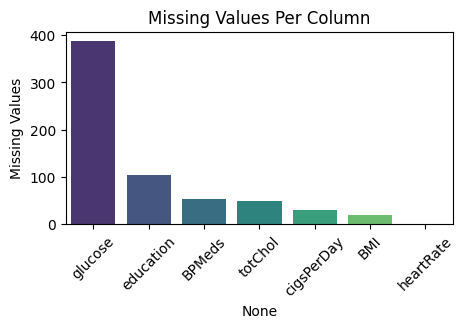

In [17]:
plt.tight_layout()
plt.figure(figsize=(5, 2.5))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()


##Handling Missing Data

Deciding whether to drop or fill missing values depends on the amount of missing data and the importance of the feature for predicting coronary heart disease.

When to Drop Missing Data?

If missing values are less than 5%, dropping them is safe.
If a column has more than 40-50% missing values, it may be unreliable and can be removed.
If missing values appear randomly, dropping may be better than inaccurate filling.
When to Fill (Impute) Missing Data?
If missing values are between 5% and 40%, filling them is better.
If a feature is important for prediction (e.g., BMI, totChol), it should not be dropped.
If missing values follow a pattern (e.g., cigsPerDay missing for non-smokers), fill logically

###Filling Strategies:

For Numerical Data (e.g., BMI, heartRate) → Use median

In [18]:
df["BMI"].fillna(df["BMI"].median(), inplace=True)

In [19]:
df["heartRate"].fillna(df["heartRate"].median(), inplace=True)

 For Categorical Data (e.g., BPMeds, currentSmoker) → Use mode (most frequent value)

In [20]:
df["BPMeds"].fillna(df["BPMeds"].mode()[0], inplace=True)

 For Conditional Missing Data (e.g., cigsPerDay) → Fill with median only for smokers, and 0 for non-smokers

In [21]:
df.loc[df["currentSmoker"] == 1, "cigsPerDay"] = df.loc[df["currentSmoker"] == 1, "cigsPerDay"].fillna(df["cigsPerDay"].median())
df["cigsPerDay"].fillna(0, inplace=True)

For Large Missing Data (e.g., glucose) → Use KNN Imputation (advanced method)

In [22]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[["glucose", "totChol", "BMI"]] = imputer.fit_transform(df[["glucose", "totChol", "BMI"]])


In [23]:
# Check if there are any missing values left
missing_after = df.isnull().sum()

# Display only columns that still have missing values (if any)
missing_after = missing_after[missing_after > 0]

if missing_after.empty:
    print(" No missing values remain in the dataset!")
else:
    print(" Some columns still have missing values:\n")
    print(missing_after)

 Some columns still have missing values:

education    105
dtype: int64


###Removing education column

The education column is not directly related to predicting coronary heart disease.
It does not provide key medical insights like cholesterol, BMI, or smoking habits.
Since it has missing values and does not contribute much to prediction, we drop it from the dataset.

In [24]:
# Drop the 'education' column
df.drop(columns=["education"], inplace=True)

# **Outlier Detection in the Dataset**

Outliers are extreme values that can negatively impact model performance by skewing the data. We need to identify and handle them carefully.

**Visual Representation of the IQR Method**

The IQR method identifies outliers based on Q1 (25th percentile) and Q3 (75th percentile). Any values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.


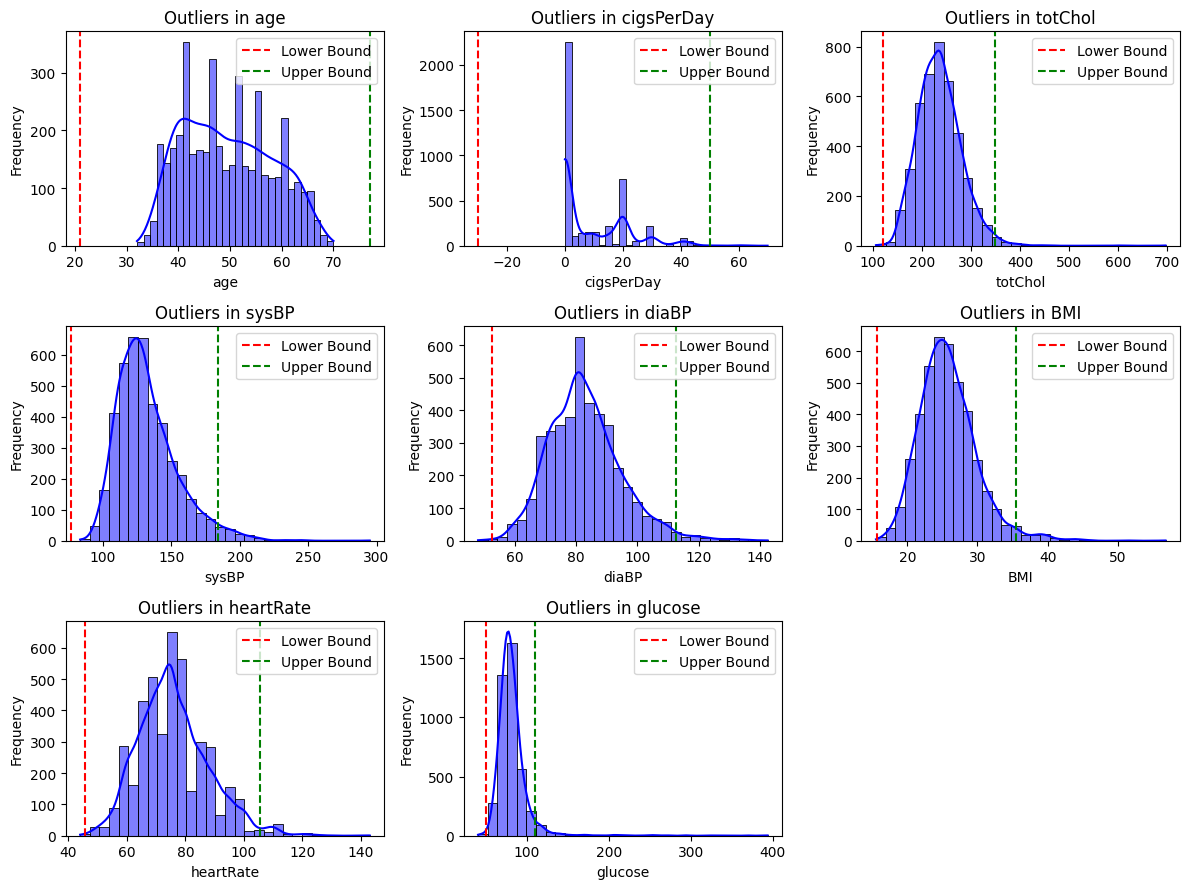

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Set up the figure size
plt.figure(figsize=(12, 9))

# Loop through numerical columns and plot histograms
for i, column in enumerate(num_cols, 1):
    # Calculate IQR and outlier thresholds
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Create subplot
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.axvline(lower_bound, color='red', linestyle='dashed', label="Lower Bound")
    plt.axvline(upper_bound, color='green', linestyle='dashed', label="Upper Bound")

    plt.title(f"Outliers in {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



Outliers can skew model training, making predictions less accurate. If they significantly distort the data, they should be capped (Winsorization) or transformed.


In [26]:
import numpy as np

# Calculate correlation between numerical features and target variable
correlation = df.corr()["TenYearCHD"].sort_values(ascending=False)
print(correlation)


TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.118483
diabetes           0.097344
male               0.088374
BPMeds             0.086448
totChol            0.081628
BMI                0.074326
prevalentStroke    0.061823
cigsPerDay         0.058729
heartRate          0.022851
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64


Outlier Analysis Based on Correlation with Ten-Year CHD Risk
From the correlation values, we can analyze which features are more important and whether outliers should be handled carefully.

**1)  Features with Strongest Correlation (Important Predictors)** Age (0.225), Systolic BP (0.216), Prevalent Hypertension (0.177), Diastolic BP (0.145)

These features have a noticeable correlation with CHD risk, so we should not remove their outliers directly.
Best Approach: Cap extreme values using the IQR method instead of removing them.

**2)Features with Weak or No Correlation**
Heart rate (0.0228), Current Smoker (0.0194)
These have very low correlation, meaning outliers in these features may not significantly impact the prediction.

**Best Approach:** Removing extreme outliers won't harm the model much.

### Handling Outliers Based on Importance
 Capping Outliers for Important Features:

Since features like age, BP, and glucose are important, we will cap their outliers instead of removing them.

In [27]:
num_cols = ["age", "sysBP", "prevalentHyp", "diaBP", "glucose"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


Removing Outliers for Low-Impact Features:

For heart rate and current smoker, extreme values can be removed since they have little impact.

In [28]:
low_corr_cols = ["heartRate", "currentSmoker"]

for col in low_corr_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



Final Check:

Now, re-run the boxplots to confirm that outliers have been handled properly.

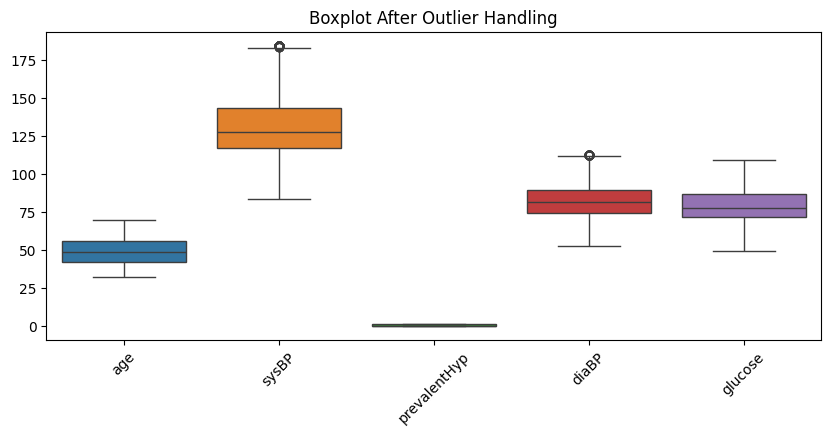

In [29]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot After Outlier Handling")
plt.show()


# Feature Scaling:

Feature scaling is the process of normalizing or standardizing numerical features so that they have a similar range. This helps machine learning models interpret the data correctly, especially when features have vastly different magnitudes.

###Why is Feature Scaling Important?
-Improves Model Performance

-Models that rely on distance metrics (e.g., KNN, SVM, Logistic Regression) perform better when features are on the same scale.
Prevents Features from Dominating

-Large values (e.g., blood pressure in hundreds) can overshadow small values (e.g., smoking status 0/1), leading to biased model learning.
Speeds Up Training

-Gradient-based models (e.g., Neural Networks, Linear Regression) converge faster when features are scaled.

In [30]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns (excluding target variable)
num_cols = ["age", "sysBP", "diaBP", "glucose", "BMI", "totChol", "heartRate", "cigsPerDay"]

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
df[num_cols] = scaler.fit_transform(df[num_cols])


##Handling Data Type Issues:
 Convert Categorical Variables (if any)
If categorical columns exist (even if they are numeric in form, like male or currentSmoker), we may need to apply encoding:

For Binary Categories (0/1) → No changes needed.
For Multi-Class Categorical Variables → Use One-Hot Encoding:

In [31]:
# Check data types
print(df.dtypes)


male                 int64
age                float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp       float64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


dataset's data types seem mostly correct, but let's check for inconsistencies:

Issues & Fixes

Columns that are likely to represents a binary condition (0 or 1). Convert them to an integer:

In [32]:
df['prevalentHyp'] = df['prevalentHyp'].astype(int)
df['BPMeds'] = df['BPMeds'].astype(int)

# **Feature Selection**

Feature selection is the process of identifying the most important variables in a dataset that contribute to model performance. It helps in:

Reducing overfitting by eliminating irrelevant features.
Improving model accuracy by focusing on relevant data.
Enhancing model efficiency by reducing computation time

One key aspect to consider during feature selection is **correlation**.

What is Correlation?
Correlation measures the relationship between two variables. It tells us how one feature changes in relation to another.

Positive Correlation (close to +1): When one feature increases, the other also increases.
Negative Correlation (close to -1): When one feature increases, the other decreases.
No Correlation (close to 0): The features are independent of each other.

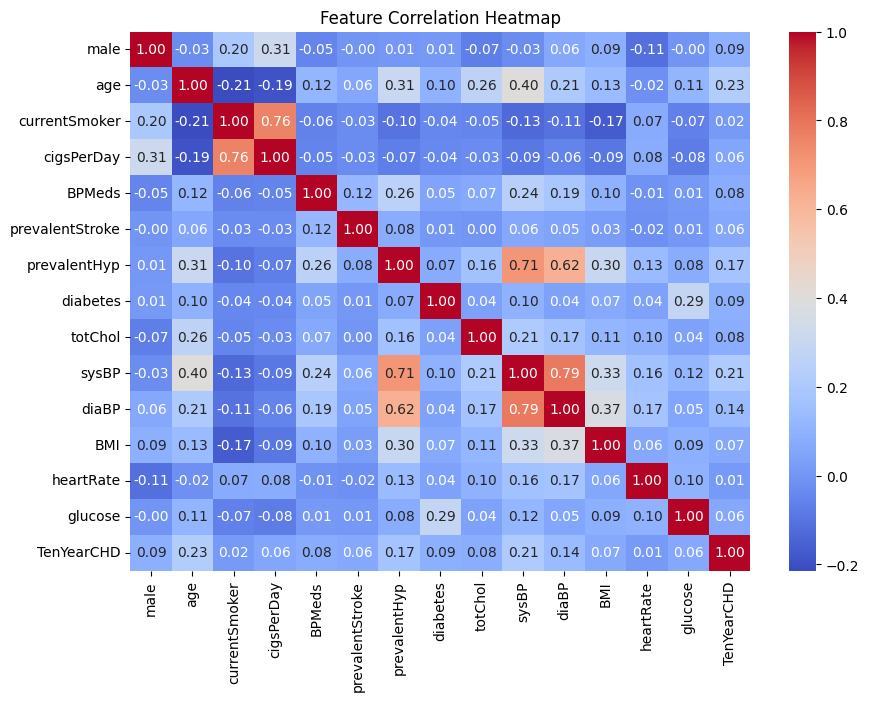

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Sequential Feature Selection (SFS)
Sequential Feature Selection (SFS) is a wrapper-based method that selects features based on model performance. It evaluates feature subsets iteratively to find the best combination.

**Forward Selection:** Starts with no features and adds the best-performing feature one by one.
Backward Selection: Starts with all features and removes the least important ones.
In our case, we used Forward Selection with a Random Forest Classifier to pick the top 8 features based on accuracy using 5-fold cross-validation.

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

# Split data for feature selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply Sequential Feature Selector (Forward Selection)
sfs = SFS(model,
          k_features=8,  # Number of features to select
          forward=True,  # Forward selection
          floating=False,
          scoring='accuracy',
          cv=5)  # 5-fold cross-validation

sfs.fit(X_train, y_train)

# Get selected features
selected_features = list(sfs.k_feature_names_)
print("Selected Features:", selected_features)

# Keep only selected features in the dataset
X_selected = X[selected_features]


Selected Features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


# **Split the Data → Train-test split for evaluation.**

In [35]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[selected_features]  # Use only selected features from SFS
y = df["TenYearCHD"]       # Target variable

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3331, 8)
Testing set size: (833, 8)


### **Cross-Validation**  

**Cross-validation** is a resampling technique used to evaluate and improve the performance of machine learning models. It helps in assessing how well a model generalizes to unseen data by splitting the dataset into multiple subsets for training and testing.  

### **Why is Cross-Validation Needed?**  
- Prevents **overfitting** (when a model performs well on training data but poorly on new data).  
- Ensures the model is **robust** and performs well on different subsets of data.  
- Provides a more **reliable performance estimate** compared to a single train-test split.  



Since recall is our priority (to minimize false negatives), we’ll apply cross-validation with recall as the scoring metric for different models. This will help us find the best model that effectively detects coronary heart disease cases.

We'll use Stratified K-Fold Cross-Validation to ensure balanced class distribution across folds.
Use recall as the scoring metric.
Compare Logistic Regression, Random Forest, Decision Tree, SVM, and KNN.

In [37]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross-validation with recall score
model_scores = {}
for name, model in models.items():
    recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    model_scores[name] = np.mean(recall_scores)

# Print results
for model, recall in model_scores.items():
    print(f"{model}: Recall = {recall:.4f}")


Logistic Regression: Recall = 0.0457
Random Forest: Recall = 0.1474
Decision Tree: Recall = 0.1594
SVM: Recall = 0.0040
KNN: Recall = 0.1194


Since Random Forest (0.1474 recall) and Decision Tree (0.1594 recall) performed the best, we will proceed with these two models.

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define parameter grids
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

dt_params = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='recall', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# GridSearchCV for Decision Tree
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='recall', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Best models
best_rf = rf_grid.best_estimator_
best_dt = dt_grid.best_estimator_

print("Best RF Model:", rf_grid.best_params_)
print("Best DT Model:", dt_grid.best_params_)


Best RF Model: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best DT Model: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [41]:
from sklearn.metrics import classification_report

# Predictions
rf_preds = best_rf.predict(X_test)
dt_preds = best_dt.predict(X_test)

# Print classification reports
print("Random Forest Performance:\n", classification_report(y_test, rf_preds))
print("Decision Tree Performance:\n", classification_report(y_test, dt_preds))


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       707
           1       0.26      0.11      0.16       126

    accuracy                           0.82       833
   macro avg       0.56      0.53      0.53       833
weighted avg       0.77      0.82      0.79       833

Decision Tree Performance:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       707
           1       0.23      0.12      0.16       126

    accuracy                           0.81       833
   macro avg       0.54      0.52      0.52       833
weighted avg       0.76      0.81      0.78       833



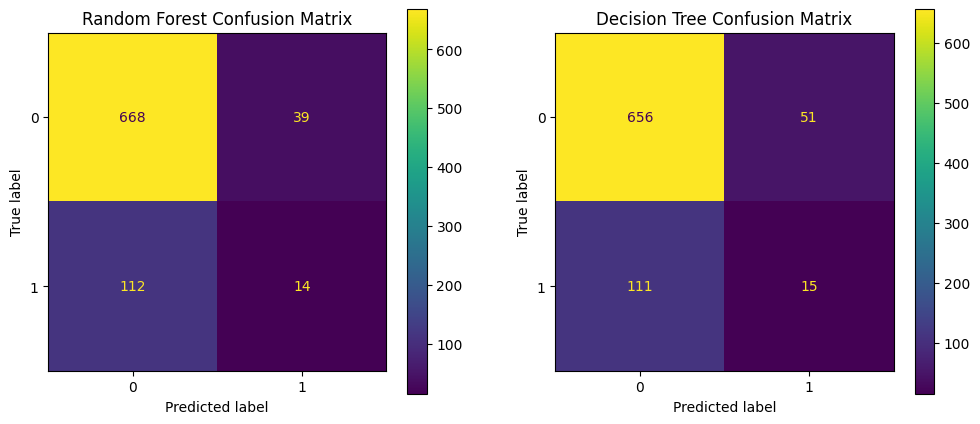

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay.from_estimator(best_dt, X_test, y_test, ax=axes[1])
axes[1].set_title("Decision Tree Confusion Matrix")

plt.show()




### **Random Forest:**
- **Overall Accuracy:** 82%  
- **Class 0 (No Cancer):** High precision (86%) and high recall (94%)  
- **Class 1 (Cancer):** Poor precision (26%) and very low recall (11%)  
- **Weighted F1-score:** 79%  
- **Key Observation:** The model strongly favors non-cancer cases, missing many actual cancer cases (low recall for Class 1).  

### **Decision Tree:**
- **Overall Accuracy:** 81%  
- **Class 0 (No Cancer):** Precision (86%) and recall (93%) are well-balanced.  
- **Class 1 (Cancer):** Low precision (23%) and very low recall (12%).  
- **Weighted F1-score:** 78%  
- **Key Observation:** Performs similarly to Random Forest but struggles with cancer detection due to class imbalance.  
---



### **Role of Class Imbalance in Cancer Detection**  
Class imbalance occurs when one class (e.g., "No Cancer") has significantly more samples than the other (e.g., "Cancer"). This imbalance causes machine learning models to **prioritize the majority class**, leading to:  

1. **High Accuracy but Poor Recall for Cancer Cases**  
   - The model learns to predict "No Cancer" most of the time because it reduces overall error.  
   - It **fails to correctly identify cancer cases**, leading to a **high false-negative rate**.  

2. **Bias in Model Learning**  
   - Standard models assume an equal distribution of classes.  
   - When one class is rare, the model **does not get enough training samples to learn its patterns** effectively.  

3. **Low Recall for Cancer (Class 1)**  
   - In your results, recall for cancer is only **11% (Random Forest) and 12% (Decision Tree)**, meaning the model **misses almost 90% of actual cancer cases**.  
   - This is unacceptable for medical diagnosis, where missing cancer cases can have severe consequences.  

---

# **Conclusion**  

The current models—**Random Forest and Decision Tree**—demonstrate **high accuracy (81–82%)**, but they severely **underperform in detecting cancer cases (low recall: 11–12%)** due to class imbalance. This leads to a **high false-negative rate**, which is unacceptable for medical diagnosis.  

To improve the model’s ability to detect cancer cases, we will implement **class imbalance handling techniques** in the next phase, including **class weighting, SMOTE (oversampling the minority class), and advanced models like XGBoost**. These techniques will help **increase recall for cancer cases**, ensuring that fewer cases are missed while maintaining overall model performance.  

By addressing class imbalance, we aim to create a more **reliable, sensitive, and medically useful model** for cancer detection.